In [1]:
import os
import calendar
from pathlib import Path # to interact with file system.
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn import preprocessing
from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression # for linear regression model.
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import math


import networkx as nx
import statsmodels.formula.api as sm

from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns # Making statistical graphs on top of what matplot can do 
from sklearn import preprocessing

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import gainsChart, liftChart
import matplotlib.pylab as plt
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

no display found. Using non-interactive Agg backend


In [57]:
#importing the csv file
df = pd.read_csv("output.csv")

In [58]:
#checking the shape of data
df.shape

(819, 17)

We can see that dataset has information for 819 houses captured on 19 different variables

In [4]:
#checking data types for columns
df.dtypes

SALE TYPE             object
PROPERTY TYPE         object
CITY                  object
STATE OR PROVINCE     object
PRICE                  int64
BEDS                 float64
BATHS                float64
LOCATION              object
SQUARE FEET          float64
YEAR BUILT           float64
DAYS ON MARKET       float64
$/SQUARE FEET        float64
STATUS                object
SOURCE                object
MLS#                  object
LATITUDE             float64
LONGITUDE            float64
dtype: object

In [5]:
#summay of dataset
df.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,LATITUDE,LONGITUDE
count,8.190000e+02,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,1.528086e+06,3.195360,2.407814,1844.884005,1968.473748,15.957265,845.849817,37.535712,-122.096611
std,1.117984e+06,1.707435,1.333594,1164.475359,36.464844,28.174567,355.438337,0.209899,0.252694
min,1.480000e+05,0.000000,1.000000,480.000000,1885.000000,1.000000,126.000000,37.175114,-122.508079
25%,8.770000e+05,2.000000,2.000000,1180.000000,1947.000000,4.000000,633.500000,37.313972,-122.412104
50%,1.295000e+06,3.000000,2.000000,1542.000000,1971.000000,10.000000,811.000000,37.560114,-121.970475
75%,1.795000e+06,4.000000,3.000000,2180.000000,2000.000000,16.000000,999.500000,37.745982,-121.886056
max,8.999000e+06,24.000000,19.000000,14390.000000,2023.000000,342.000000,6153.000000,37.805312,-121.738352


In [59]:
#summary of column price only
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df["PRICE"].describe()

count       819.00
mean    1528085.96
std     1117983.59
min      148000.00
25%      877000.00
50%     1295000.00
75%     1795000.00
max     8999000.00
Name: PRICE, dtype: float64

In [60]:
#checking all the column names
df.columns

Index(['SALE TYPE', 'PROPERTY TYPE', 'CITY', 'STATE OR PROVINCE', 'PRICE',
       'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'STATUS', 'SOURCE', 'MLS#',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [61]:
#modifying column names to eliminate the in between spaces
df.columns = [s.strip().replace(' ', '_') for s in df.columns]
df.columns

Index(['SALE_TYPE', 'PROPERTY_TYPE', 'CITY', 'STATE_OR_PROVINCE', 'PRICE',
       'BEDS', 'BATHS', 'LOCATION', 'SQUARE_FEET', 'YEAR_BUILT',
       'DAYS_ON_MARKET', '$/SQUARE_FEET', 'STATUS', 'SOURCE', 'MLS#',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [62]:
#checking head of data
df.head()

,SALE_TYPE,PROPERTY_TYPE,CITY,STATE_OR_PROVINCE,PRICE,BEDS,BATHS,LOCATION,SQUARE_FEET,YEAR_BUILT,DAYS_ON_MARKET,$/SQUARE_FEET,STATUS,SOURCE,MLS#,LATITUDE,LONGITUDE
0,Redfin Data,Single Family Residential,Fremont,CA,1300000,3.00,2.00,Fremont,1067.00,1961.00,7.00,1218.00,Pre On-Market,Coming Soon,92185,37.53,-121.99
1,Redfin Data,Single Family Residential,Fremont,CA,1380000,4.00,2.50,Fremont,1866.00,1998.00,21.00,740.00,Pre On-Market,Coming Soon,91889,37.54,-122.01
2,MLS Listing,Single Family Residential,Fremont,CA,900000,3.00,2.00,Niles Area,1120.00,1955.00,1.00,804.00,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41025752,37.58,-121.96
3,MLS Listing,Townhouse,Fremont,CA,990000,3.00,1.50,Valle De La Paz,1242.00,1971.00,1.00,797.00,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41025224,37.54,-121.92
4,MLS Listing,Townhouse,Fremont,CA,748888,3.00,1.50,Cherry Lane,1180.00,1971.00,2.00,635.00,Active,"bridgeMLS, Bay East AOR, or Contra Costa AOR",41025667,37.57,-121.97


(0.0, 3500000.0)

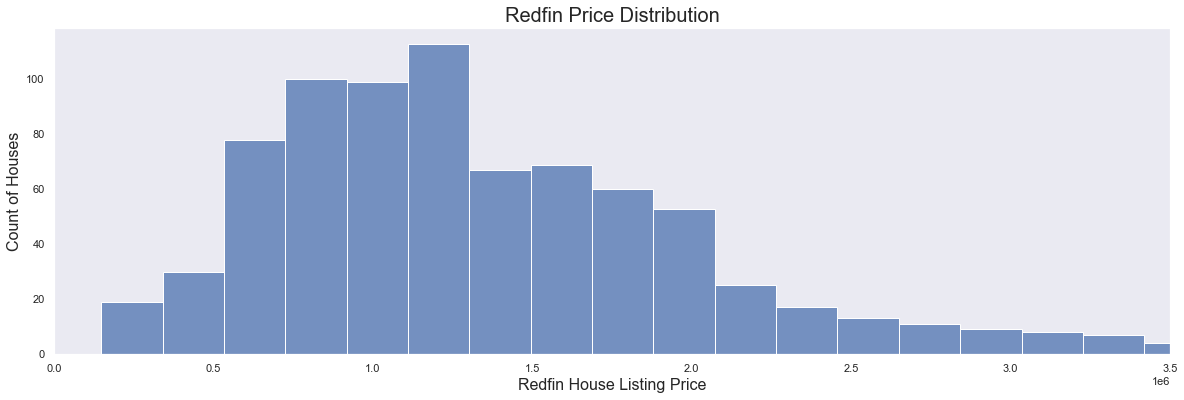

In [10]:
#Redfin price distribution
plt.figure(figsize=(20, 6))
sns.set(style = 'dark')
sns.histplot(df['PRICE'])
plt.title('Redfin Price Distribution', fontsize = 20)
plt.xlabel('Redfin House Listing Price', fontsize = 16)
plt.ylabel('Count of Houses', fontsize = 16)
plt.xlim(0, 3500000)

Price for houses listed in Redfin is right skewed. This means that the distribution of house prices is not symmetrical, and the tail of the distribution is stretched out towards the right-hand side. In other words, there are a few houses that are priced much higher than the majority of houses, causing the distribution to be skewed to the right. For example, it might indicate that there is a high demand for luxury homes in the area or that certain neighborhoods are becoming more exclusive and expensive. 

Text(0, 0.5, 'Count of Houses')

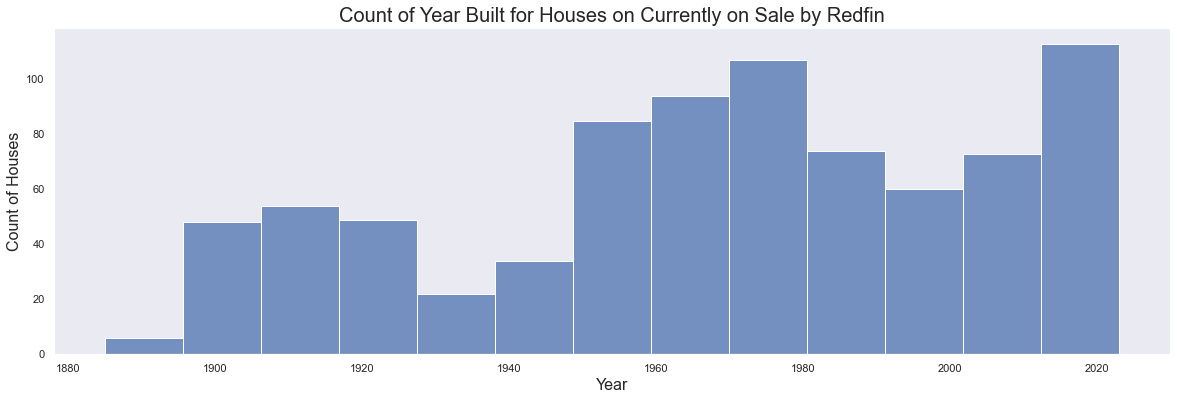

In [11]:
#Distributions of the data by year built of houses currently on sale by Redfin

plt.figure(figsize=(20, 6))
sns.histplot(df['YEAR_BUILT'])
plt.title('Count of Year Built for Houses on Currently on Sale by Redfin', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Count of Houses', fontsize = 16)

In [12]:
#checking the count of housing per city in dataset
df['CITY'].value_counts()

San Jose         321
San Francisco    280
Fremont           86
Hayward           80
Dublin            26
Campbell           7
Los Gatos          4
Milpitas           3
Cupertino          2
Santa Clara        2
Castro Valley      2
San Lorenzo        2
Union City         1
Daly City          1
San Ramon          1
Alviso             1
Name: CITY, dtype: int64

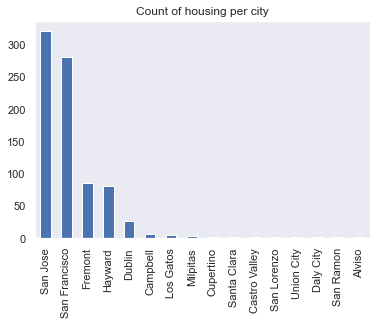

In [13]:
df.CITY.value_counts().plot.bar(title = 'Count of housing per city')

plt.show()

<AxesSubplot:title={'center':'Price per city'}, xlabel='CITY'>

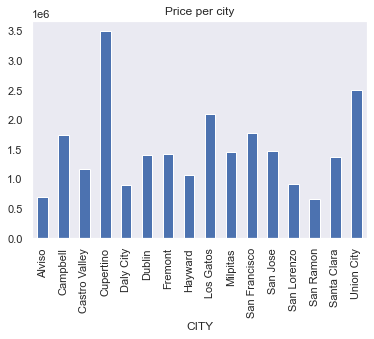

In [14]:
#plot of average price for each city
df.groupby('CITY').mean()['PRICE'].plot.bar(title='Price per city')

Average selling price for a house is highest in Cupertino and lowest is Alviso.

In [15]:
#Top 5 Cities with average prices
df1 = df[['CITY', 'PRICE']]
df1 = df1.groupby('CITY').mean().reset_index()
df1 = df1.sort_values(by='PRICE', ascending=False)
print("Top 10 cities per average price:")
for i, row in df1.head(5).iterrows():
    print(f"{row['CITY']}: ${round(row['PRICE'], 2)}")
    

#Bottom 5 Cities with average prices
df2 = df[['CITY', 'PRICE']]
df2 = df2.groupby('CITY').mean().reset_index()
df2 = df2.sort_values(by='PRICE', ascending=True)
print()
print("Bottom 10 cities per average price:")
for i, row in df2.head(5).iterrows():
    print(f"{row['CITY']}: ${round(row['PRICE'], 2)}")


Top 10 cities per average price:
Cupertino: $3496500.0
Union City: $2499000.0
Los Gatos: $2091944.0
San Francisco: $1768888.96
Campbell: $1732126.71

Bottom 10 cities per average price:
San Ramon: $660000.0
Alviso: $699999.0
Daly City: $899000.0
San Lorenzo: $914850.0
Hayward: $1056481.74


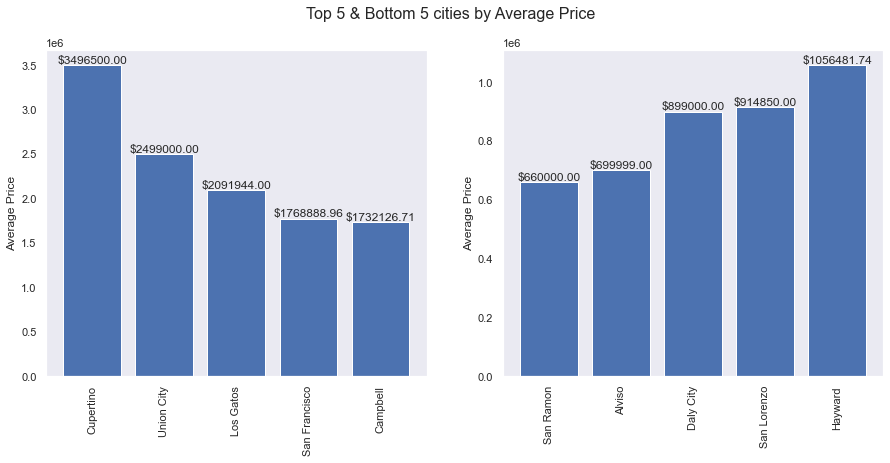

In [16]:
#plot of Top 5 and bottom 5 cities wrt average price

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#Top 5 cities per average price
bars1 = axs[0].bar(df1.head(5)['CITY'], df1.head(5)['PRICE'])
axs[0].set_ylabel('Average Price')
axs[0].set_xticklabels(df1.head(5)['CITY'], rotation=90)

# Adding numbers on top of the bar
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2., height, f'${height:.2f}', ha='center', va='bottom')

# Bottom 5 cities per average price
bars2 = axs[1].bar(df2.head(5)['CITY'], df2.head(5)['PRICE'])
axs[1].set_ylabel('Average Price')
axs[1].set_xticklabels(df2.head(5)['CITY'], rotation=90)

# Adding numbers on top of the bar
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2., height, f'${height:.2f}', ha='center', va='bottom')
fig.suptitle('Top 5 & Bottom 5 cities by Average Price', fontsize=16)

plt.show()

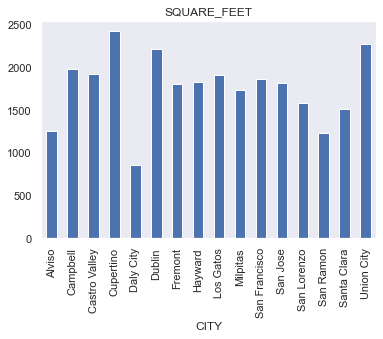

In [17]:
#plot of average sq feet for each city
ax = df.groupby('CITY').mean()['SQUARE_FEET'].plot.bar(title = 'SQUARE_FEET', sort_columns=True)
plt.show()

In [18]:
#top 5 cites as per avg sq feet price
df3 = df[['CITY', 'SQUARE_FEET']]
df3 = df3.groupby('CITY').mean().reset_index()
df3 = df3.sort_values(by='SQUARE_FEET', ascending=False)
print("Top 5 Cities per high $avg square feet:")
for i, row in df3.head(5).iterrows():
    
    print(f"{row['CITY']}: ${round(row['SQUARE_FEET'], 2)}")
    

#bottom 5 cites as per avg sq feet price
df4 = df[['CITY', 'SQUARE_FEET']]
df4 = df4.groupby('CITY').mean().reset_index()
df4 = df4.sort_values(by='SQUARE_FEET', ascending=True)
print("")
print("Top 5 Cities per low $avg square feet:")
for i, row in df4.head(5).iterrows():
    print(f"{row['CITY']}: ${round(row['SQUARE_FEET'], 2)}")

Top 5 Cities per high $avg square feet:
Cupertino: $2425.0
Union City: $2273.0
Dublin: $2211.0
Campbell: $1983.0
Castro Valley: $1922.0

Top 5 Cities per low $avg square feet:
Daly City: $850.0
San Ramon: $1230.0
Alviso: $1254.0
Santa Clara: $1511.0
San Lorenzo: $1586.0


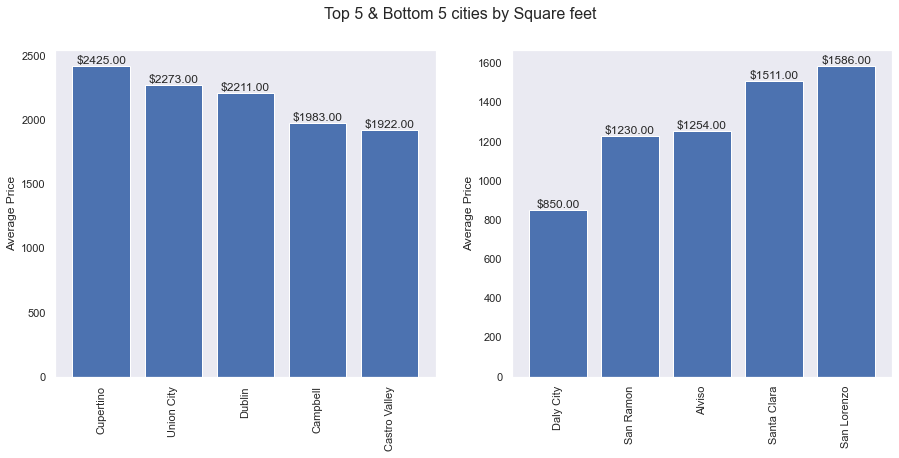

In [19]:
#plot of Top 5 and bottom 5 cities wrt square feet

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#Top 5 cities per average price
bars1 = axs[0].bar(df3.head(5)['CITY'], df3.head(5)['SQUARE_FEET'])
axs[0].set_ylabel('Average Price')
axs[0].set_xticklabels(df3.head(5)['CITY'], rotation=90)

# Adding numbers on top of the bar
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2., height, f'${height:.2f}', ha='center', va='bottom')

# Bottom 5 cities per average price
bars2 = axs[1].bar(df4.head(5)['CITY'], df4.head(5)['SQUARE_FEET'])
axs[1].set_ylabel('Average Price')
axs[1].set_xticklabels(df4.head(5)['CITY'], rotation=90)

# Adding numbers on top of the bar
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2., height, f'${height:.2f}', ha='center', va='bottom')
fig.suptitle('Top 5 & Bottom 5 cities by Square feet', fontsize=16)

plt.show()

PROPERTY_TYPE
Multi-Family (5+ Unit)      2923333.33
Single Family Residential   1867140.07
Other                       1799737.60
Multi-Family (2-4 Unit)     1760215.71
Condo/Co-op                 1130899.78
Townhouse                   1084806.63
Mobile/Manufactured Home     286403.54
Name: PRICE, dtype: float64


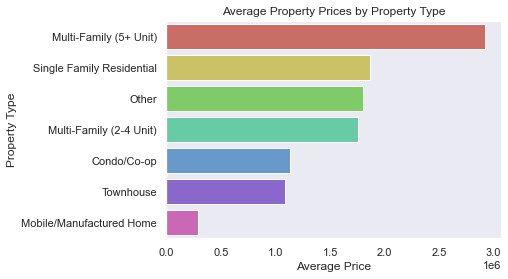

In [20]:
#Average Property Prices by Property Type
grouped = df.groupby(['PROPERTY_TYPE'])

# calculate the mean price for each property type
average_price = grouped['PRICE'].mean()

# sort the values from high to low
average_price_sorted = average_price.sort_values(ascending=False)

# print the resulting dataframe
print(average_price_sorted)



# create a color palette
colors = sns.color_palette('hls', len(average_price_sorted))

# create a horizontal bar plot
sns.barplot(x=average_price_sorted.values, y=average_price_sorted.index, palette=colors)

# set the plot title and labels
plt.title('Average Property Prices by Property Type')
plt.xlabel('Average Price')
plt.ylabel('Property Type')

# display the plot
plt.show()

PROPERTY_TYPE
Multi-Family (5+ Unit)      5551.33
Multi-Family (2-4 Unit)     2767.75
Single Family Residential   2074.65
Other                       1886.80
Townhouse                   1687.24
Condo/Co-op                 1320.29
Mobile/Manufactured Home    1257.92
Name: SQUARE_FEET, dtype: float64


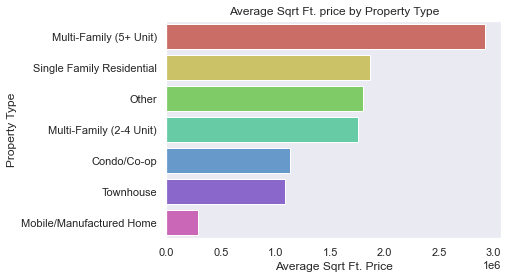

In [21]:
#Average Sqrt Ft. price by Property Type
grouped1 = df.groupby(['PROPERTY_TYPE'])

# calculate the mean price for each property type
average_price = grouped['SQUARE_FEET'].mean()

# sort the values from high to low
average_price_sorted1 = average_price.sort_values(ascending=False)

# print the resulting dataframe
print(average_price_sorted1)



# create a color palette
colors = sns.color_palette('hls', len(average_price_sorted1))

# create a horizontal bar plot
sns.barplot(x=average_price_sorted.values, y=average_price_sorted.index, palette=colors)

# set the plot title and labels
plt.title('Average Sqrt Ft. price by Property Type')
plt.xlabel('Average Sqrt Ft. Price')
plt.ylabel('Property Type')

# display the plot
plt.show()

In [22]:
#crosstab showing count of beds in every city
c=pd.crosstab(df.CITY,df.BEDS, margins=True, margins_name="Total")
c

BEDS,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,21.0,24.0,Total
CITY,,,,,,,,,,,,,,
Alviso,0,0,0,1,0,0,0,0,0,0,0,0,0,1
Campbell,0,0,0,3,3,0,1,0,0,0,0,0,0,7
Castro Valley,0,0,0,1,1,0,0,0,0,0,0,0,0,2
Cupertino,0,0,0,1,0,1,0,0,0,0,0,0,0,2
Daly City,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Dublin,0,1,3,5,15,2,0,0,0,0,0,0,0,26
Fremont,0,8,26,26,18,4,1,2,1,0,0,0,0,86
Hayward,0,0,24,24,21,7,1,0,1,1,1,0,0,80
Los Gatos,0,0,1,1,2,0,0,0,0,0,0,0,0,4


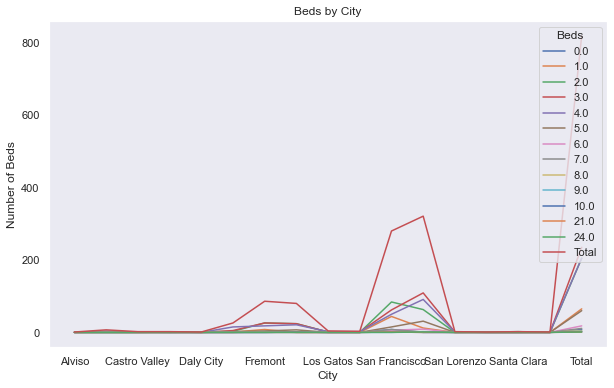

In [23]:
# Plot the above crosstab
c.plot(kind='line', figsize=(10, 6))
plt.title('Beds by City')
plt.xlabel('City')
plt.ylabel('Number of Beds')
plt.legend(title='Beds', loc='upper right')

plt.show()

In [24]:
#crosstab showing property status distribution for each city
pd.crosstab(df.CITY,df.STATUS, margins=True, margins_name="Total")

STATUS,Active,Pre On-Market,Total
CITY,,,
Alviso,1,0,1
Campbell,7,0,7
Castro Valley,2,0,2
Cupertino,2,0,2
Daly City,1,0,1
Dublin,26,0,26
Fremont,84,2,86
Hayward,80,0,80
Los Gatos,4,0,4


 Most of the houses are on sale. Only 4 houses are pre-on market. Out of all the houses that are on sale, majority are in San Jose city.

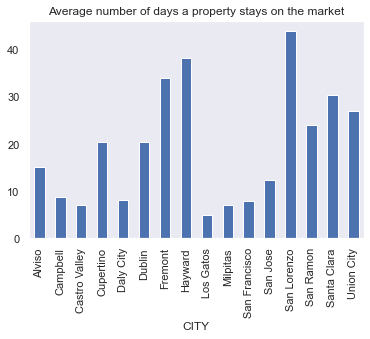

In [25]:
#Average number of days a property stays on the market
df.groupby('CITY').mean()['DAYS_ON_MARKET'].plot.bar(title = 'Average number of days a property stays on the market')
plt.show()

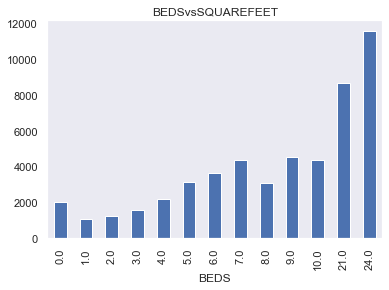

In [26]:
#relationship between the number of beds in a house and its average square footage.
df.groupby('BEDS').mean()['SQUARE_FEET'].plot.bar(title = 'BEDSvsSQUAREFEET')
plt.show()

In [27]:
#listing all combination of City, Location and Property type

pd.set_option('display.max_rows', None) # to display all rows
pd.set_option('display.max_columns', None) # to display all columns
grouped = df.groupby(['CITY', 'LOCATION'])

# define a function to extract the property types for each group
def extract_property_types(group):
    return group['PROPERTY_TYPE'].unique()

# apply the function to each group and reset the index
result = grouped.apply(extract_property_types).reset_index()

# rename the columns
result.columns = ['CITY', 'LOCATION', 'PROPERTY_TYPE']

# print the resulting dataframe
result

,CITY,LOCATION,PROPERTY_TYPE
0,Alviso,ALVISO,[Single Family Residential]
1,Campbell,CAMPBELL,"[Single Family Residential, Townhouse]"
2,Castro Valley,Castro Valley,[Single Family Residential]
3,Cupertino,CUPERTINO,[Single Family Residential]
4,Daly City,DALY CITY,[Single Family Residential]
5,Dublin,Abbey Neighborhood at Boulevard,[Townhouse]
6,Dublin,Boulevard - Lombard,[Multi-Family (2-4 Unit)]
7,Dublin,Boulevard - Venice,[Multi-Family (2-4 Unit)]
8,Dublin,Ca Highlands,[Condo/Co-op]
9,Dublin,Dublin,"[Condo/Co-op, Single Family Residential]"


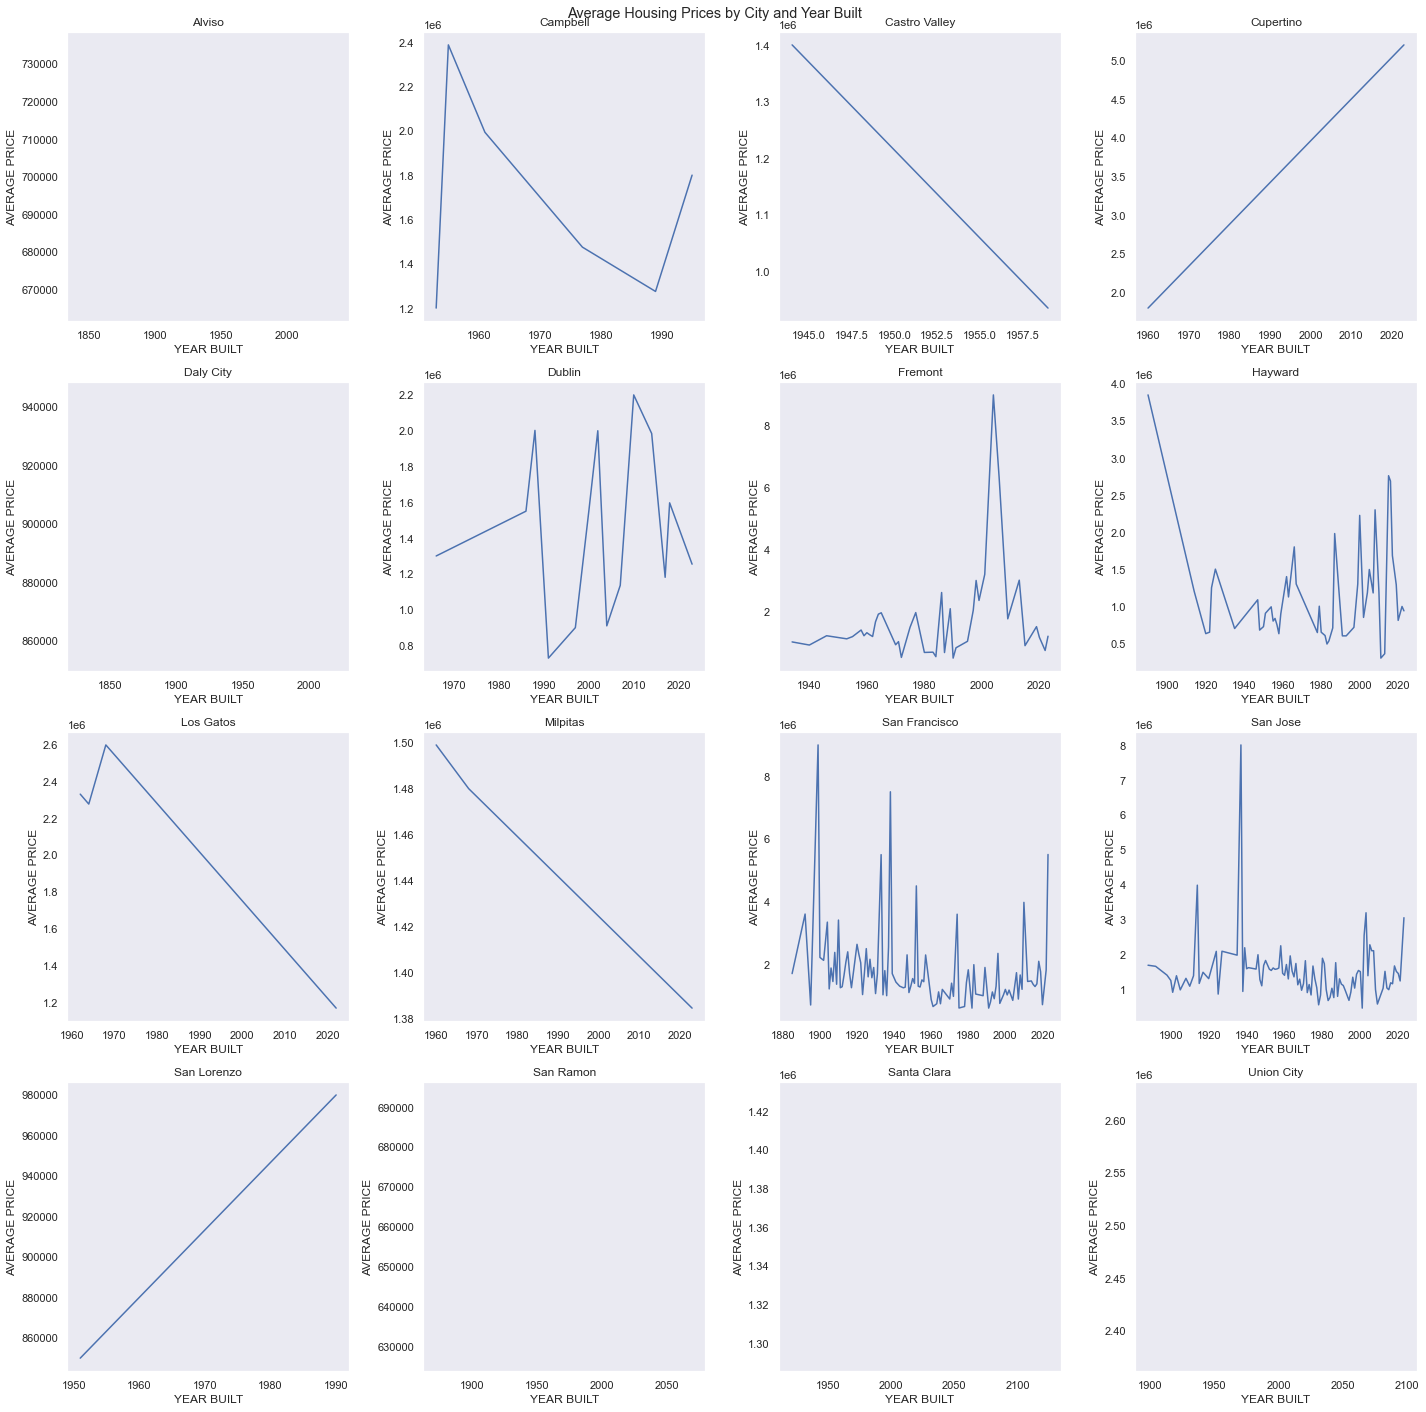

In [29]:
#variation in average price over the years for different Cities
grouped = df.groupby(['CITY', 'YEAR_BUILT'])['PRICE'].mean().reset_index()

# extracting the unique cities
cities = grouped['CITY'].unique()

# Calculating the number of rows and columns needed to fit all the cities
num_cities = len(cities)
num_rows = min(4, (num_cities + 3) // 4)
num_cols = min(4, num_cities)

# Creating a figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

# Looping through each city and plot it on a subplot
for i, city in enumerate(cities):
    data = grouped[grouped['CITY'] == city]
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.plot(data['YEAR_BUILT'], data['PRICE'])
    ax.set_xlabel('YEAR BUILT')
    ax.set_ylabel('AVERAGE PRICE')
    ax.set_title(city)

# Setting the overall title for the figure
fig.suptitle('Average Housing Prices by City and Year Built')

# Adjusting the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

San Francisco and San Jose have experienced the largest increase in property values over a specific period. This can indicate a strong demand for housing in these areas, which may be driven by factors such as job growth, population growth, and limited housing supply. This may also suggest that the real estate market in these cities is performing well, providing a good return on investment for homeowners and real estate investors. It can also mean that properties in these areas are priced higher compared to other cities in the region due to the higher demand, making it more difficult for homebuyers to afford homes in these areas.

Cupertino has a positive linear growth. Thus it has the potential to become an attractive and highly desirable location for real estate investment in the near future. This could be due to several reasons such as the city's growing economy, high quality of life, excellent schools, low crime rates, convenient location, and other factors that make it an ideal place to live and work.

In [28]:
num=['PRICE','BEDS','BATHS', 'SQUARE_FEET','DAYS_ON_MARKET','$/SQUARE_FEET']

In [29]:
df_num=df[num]

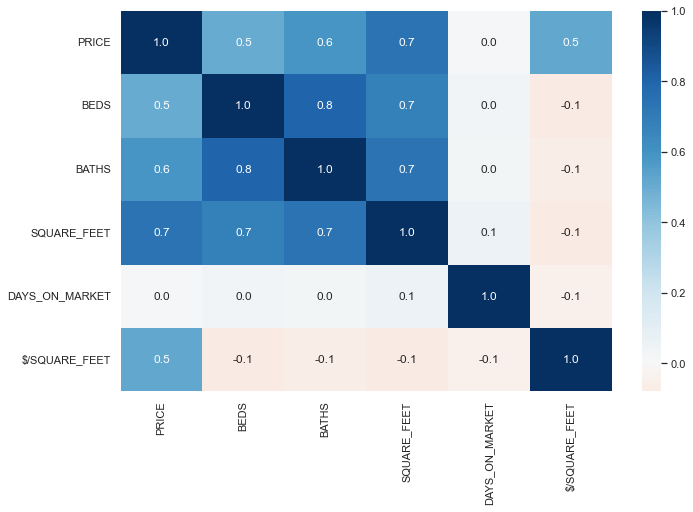

In [30]:
corr = round(df_num.corr(),2)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [31]:
a=pd.crosstab(df.CITY,df.PROPERTY_TYPE, margins=True, margins_name="Total")
a

PROPERTY_TYPE,Condo/Co-op,Mobile/Manufactured Home,Multi-Family (2-4 Unit),Multi-Family (5+ Unit),Other,Single Family Residential,Townhouse,Total
CITY,,,,,,,,
Alviso,0,0,0,0,0,1,0,1
Campbell,0,0,0,0,0,5,2,7
Castro Valley,0,0,0,0,0,2,0,2
Cupertino,0,0,0,0,0,2,0,2
Daly City,0,0,0,0,0,1,0,1
Dublin,8,0,3,0,0,9,6,26
Fremont,34,0,5,0,0,37,10,86
Hayward,17,2,5,0,0,46,10,80
Los Gatos,1,0,0,0,0,3,0,4


In [63]:
#Model 1: performing linear regression on the given dataset using the numerical predictors to predict the outcome 'PRICE'.

predictors = ['BEDS', 'BATHS', 'SQUARE_FEET','DAYS_ON_MARKET', '$/SQUARE_FEET','CITY','STATUS']
outcome = 'PRICE'

X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]

# partition data
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

redfin_lm = LinearRegression()
redfin_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', redfin_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': redfin_lm.coef_}))

# print performance measures
regressionSummary(train_y, redfin_lm.predict(train_X))

intercept  -1204516.8189803772
               Predictor  coefficient
0                   BEDS   -126159.66
1                  BATHS     66845.38
2            SQUARE_FEET       942.92
3         DAYS_ON_MARKET      -777.71
4          $/SQUARE_FEET      1753.66
5          CITY_Campbell   -175269.09
6     CITY_Castro Valley   -235388.15
7         CITY_Cupertino    155609.54
8         CITY_Daly City         0.00
9            CITY_Dublin   -331739.23
10          CITY_Fremont   -151373.85
11          CITY_Hayward   -235557.58
12        CITY_Los Gatos   -198813.52
13         CITY_Milpitas   -111825.96
14    CITY_San Francisco   -202646.21
15         CITY_San Jose   -205473.58
16      CITY_San Lorenzo   -171713.82
17        CITY_San Ramon         0.00
18      CITY_Santa Clara         0.00
19       CITY_Union City         0.00
20  STATUS_Pre On-Market     90121.01

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 391231.4748
         

In [65]:
pred_y = redfin_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, redfin_lm))
print('AIC : ', AIC_score(train_y, pred_y, redfin_lm))
print('BIC : ', BIC_score(train_y, pred_y, redfin_lm))

adjusted r2 :  0.892884603908219
AIC :  14084.665326481881
BIC :  14181.183541421155


The adjusted R2 is 0.8953052974332667, which means that the model explains around 89.53% of the variance in the dependent variable.

In [66]:
# Use predict() to make predictions on a new set
redfin_lm_pred = redfin_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': redfin_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - redfin_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, redfin_lm_pred)

     Predicted   Actual    Residual
81   809473.14  1000000   190526.86
684 2878737.12  2985000   106262.88
8    592735.67   669000    76264.33
241 1576446.75   995000  -581446.75
265 1660298.99   890000  -770298.99
154 2634215.60  2695000    60784.40
101 1242502.49   698000  -544502.49
17  1878733.41  1799000   -79733.41
233 1301743.40  1200000  -101743.40
797  616566.75   699000    82433.25
488  -13562.47   289000   302562.47
540 1387873.76  1398000    10126.24
774  466956.03   750000   283043.97
806 1118165.64  1175000    56834.36
518 1154920.23  1188000    33079.77
60   204933.53   480000   275066.47
577 1425360.24  1299999  -125361.24
634 1958149.65  1950000    -8149.65
107 4947938.89   825000 -4122938.89
744 2468971.52  1800000  -668971.52

Regression statistics

                      Mean Error (ME) : -83471.6672
       Root Mean Squared Error (RMSE) : 501863.2572
            Mean Absolute Error (MAE) : 227137.0902
          Mean Percentage Error (MPE) : -0.6973
Mean Absolute Pe

In [67]:
#We will first define a couple of functions to be used in Exhaustive Search function
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model


In [68]:
def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [86]:
# backward
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# The initial model is the constant model - this requires special handling in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)



In [87]:
#Using stepwise
bestSW_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

# Fit the linear regression model using the selected variables
bestSW_model.fit(train_X[best_variables], train_y)

# Calculate adjusted R-squared for the validation set
n = len(valid_y)
p = len(best_variables)
adj_r2 = 1 - (1 - bestSW_model.score(valid_X[best_variables], valid_y)) * (n - 1) / (n - p - 1)

# Print adjusted R-squared and other performance measures
print('Adjusted R-squared:', adj_r2)
regressionSummary(valid_y, bestSW_model.predict(valid_X[best_variables]))

Variables: BEDS, BATHS, SQUARE_FEET, DAYS_ON_MARKET, $/SQUARE_FEET
Start: score=15160.99, constant
Step: score=14772.01, add SQUARE_FEET
Step: score=14099.60, add $/SQUARE_FEET
Step: score=14062.53, add BEDS
Step: score=14057.47, add BATHS
Step: score=14057.47, unchanged None
Adjusted R-squared: 0.7139033818009509

Regression statistics

                      Mean Error (ME) : -79561.9211
       Root Mean Squared Error (RMSE) : 494451.5331
            Mean Absolute Error (MAE) : 221907.7031
          Mean Percentage Error (MPE) : -0.3213
Mean Absolute Percentage Error (MAPE) : 21.3958


In [73]:
#Model 2: performing linear regression on the given dataset using the numerical predictors to predict the outcome 'PRICE'.
#with less predictors

predictors = ['BEDS', 'BATHS', 'SQUARE_FEET','DAYS_ON_MARKET', '$/SQUARE_FEET']
outcome = 'PRICE'

X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]

# partition data
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

redfin_lm = LinearRegression()
redfin_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', redfin_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': redfin_lm.coef_}))

# print performance measures
regressionSummary(train_y, redfin_lm.predict(train_X))

intercept  -1419296.0012642643
        Predictor  coefficient
0            BEDS   -124356.36
1           BATHS     64214.57
2     SQUARE_FEET       942.68
3  DAYS_ON_MARKET      -853.33
4   $/SQUARE_FEET      1768.56

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 393327.7967
            Mean Absolute Error (MAE) : 203979.0923
          Mean Percentage Error (MPE) : 1.4373
Mean Absolute Percentage Error (MAPE) : 16.3226


In [74]:
pred_y = redfin_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, redfin_lm))
print('AIC : ', AIC_score(train_y, pred_y, redfin_lm))
print('BIC : ', BIC_score(train_y, pred_y, redfin_lm))

adjusted r2 :  0.8953052974332667
AIC :  14057.913095840664
BIC :  14087.288204735225


In [75]:
# Use predict() to make predictions on a new set
redfin_lm_pred = redfin_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': redfin_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - redfin_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, redfin_lm_pred)

     Predicted   Actual    Residual
81   734061.06  1000000   265938.94
684 2878057.81  2985000   106942.19
8    537386.39   669000   131613.61
241 1565054.22   995000  -570054.22
265 1668241.26   890000  -778241.26
154 2636660.33  2695000    58339.67
101 1247783.73   698000  -549783.73
17  1827875.42  1799000   -28875.42
233 1300328.48  1200000  -100328.48
797  647697.75   699000    51302.25
488  -20142.91   289000   309142.91
540 1396546.93  1398000     1453.07
774  498902.42   750000   251097.58
806 1140322.68  1175000    34677.32
518 1158029.60  1188000    29970.40
60   146456.55   480000   333543.45
577 1421561.51  1299999  -121562.51
634 1960831.11  1950000   -10831.11
107 4935125.99   825000 -4110125.99
744 2494522.98  1800000  -694522.98

Regression statistics

                      Mean Error (ME) : -78226.6440
       Root Mean Squared Error (RMSE) : 498358.1600
            Mean Absolute Error (MAE) : 224667.1025
          Mean Percentage Error (MPE) : -0.0530
Mean Absolute Pe

In [76]:
#We will first define a couple of functions to be used in Exhaustive Search function
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

In [77]:
def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [78]:
#Exhaustive search
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

In [79]:
data = []
for idx, result in enumerate(results):
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    MAE=mean_absolute_error(valid_y, model.predict(valid_X[variables]))
    results[idx]['val_MAE'] = MAE
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC,'MAE' : MAE}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

In [80]:
# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC','MAE' ) + tuple(sorted(allVariables))))
# Define the width of output presentation to be wider to display results in two rows (instead of more rows otherwise). 
pd.set_option('display.width', 100)


# Reset the output width to the default. 
pd.reset_option('display.width')

   n  r2adj      AIC       MAE  $/SQUARE_FEET  BATHS   BEDS  DAYS_ON_MARKET  \
0  1   0.55 14772.01 431004.24          False  False  False           False   
1  2   0.89 14099.60 188240.54           True  False  False           False   
2  3   0.89 14062.53 221835.04           True  False   True           False   
3  4   0.90 14057.47 221907.70           True   True   True           False   
4  5   0.90 14057.91 224667.10           True   True   True            True   

   SQUARE_FEET  
0         True  
1         True  
2         True  
3         True  
4         True  


In [81]:
#Final Model based on Exhaustive search ( We looked into training adjusted R square and Validation MAE)
# final model we choose
model_idx = 2
final_predictors = results[model_idx]['variables']
final_model = results[model_idx]['model']
val_mae = results[model_idx]['val_MAE']
val_r2adj = results[model_idx]['val_MAE']

In [82]:
print("Final model information:\n")
print("Predictors: \n{} ".format(final_predictors))
print("\nValidation MAE: \n{} ".format(val_mae))

Final model information:

Predictors: 
['BEDS', 'SQUARE_FEET', '$/SQUARE_FEET'] 

Validation MAE: 
221835.0371141757 


In [83]:
# print coefficients
print('intercept ', final_model.intercept_)
print(pd.DataFrame({'Predictor': final_predictors, 'coefficient': final_model.coef_}))

intercept  -1424041.1362984339
       Predictor  coefficient
0           BEDS    -99474.45
1    SQUARE_FEET       976.62
2  $/SQUARE_FEET      1772.64
